# Checkpoint 3

Read the Checkpoint 3 description in the PDF file (Learn). Consult this PDF whenever you have doubts about what needs to be done in each task.

If you downloaded this notebook from Learn, make sure to also download the file called "signals.zip". Unzip this file in the same location as your notebook.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas
from scipy.signal import find_peaks
from scipy.signal import argrelmax
from scipy import optimize

In [622]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Data files
The cells below will read all of the data files into pandas `DataFrame` objects. The `file_dir` variable in the cell below denotes the name of the folder in which the files are stored. The folder should be in the same location as this notebook.

Each file contains an array of time values, called "t", and arrays of input signals, called "x...", and output signals, called "y...".

* `data_delta` - a delta function input signal
* `data_step` - a step function input signal
* `data_noise` - white noise input signal
* `data_sine_ampl` - multiple sine wave input signals with the same frequency, but different amplitudes
* `data_sine_freq` - multiple sine wave input signals with the same amplitude, but different frequencies
* `data_unknown` - an input signal with unknown functional form. The output signal is not given.

In [623]:
# the folder containing the data files
file_dir = 'signals'

In [624]:
data_delta     = pandas.read_csv(os.path.join(file_dir, 'delta.txt'),sep='\t')
data_step      = pandas.read_csv(os.path.join(file_dir, 'step.txt'),sep='\t')
data_noise     = pandas.read_csv(os.path.join(file_dir, 'white_noise.txt'),sep='\t')
data_sine_ampl = pandas.read_csv(os.path.join(file_dir, 'sine_different_amplitudes.txt'),sep='\t')
data_sine_freq = pandas.read_csv(os.path.join(file_dir, 'sine_different_frequencies.txt'),sep='\t')
data_unknown   = pandas.read_csv(os.path.join(file_dir, 'unknown.txt'),sep='\t')

## Task 1
Plot the filter’s response to a sine wave of angular frequency $\omega=0.5$.

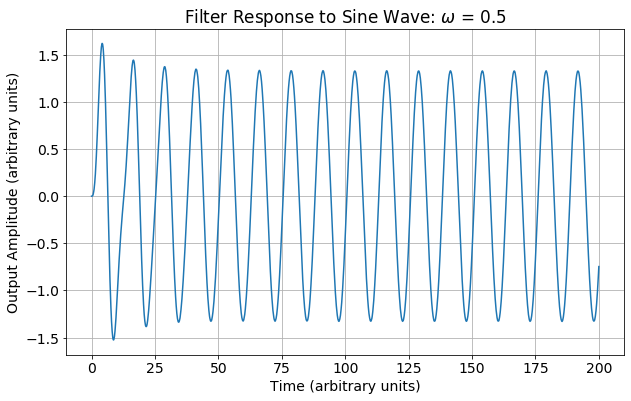

In [625]:
def plot_response_05():
    output_05 = data_sine_freq['yw0.5'] # Obtaining relevant column.
    N = output_05.size
    domain = np.linspace(0, 200, N)
    
    # Plotting.
    plt.title('Filter Response to Sine Wave: $\omega$ = 0.5')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('Output Amplitude (arbitrary units)')
    plt.plot(domain, output_05)
    plt.grid()
    plt.show()
    
plot_response_05()

## Task 2
Plot the frequency response to sine waveforms of $\omega=0,0.05,0.1,0.15,...,2.0$. This should be a single plot of $H(\omega$).

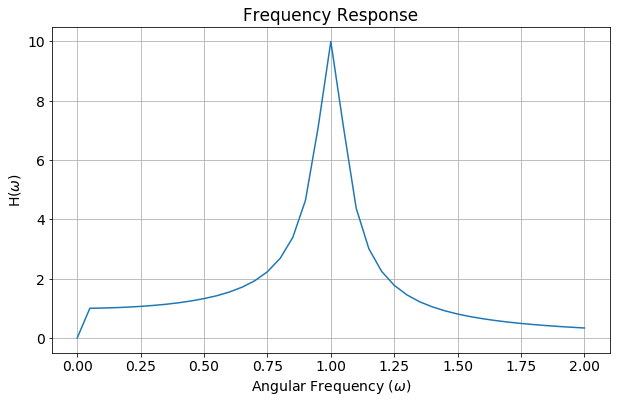

In [627]:
def get_H(y): 
    # Finding largest peak after a 'long' time has passed
    index = int(y.size*(2/3)) 
    H = y[index:].max() # Set response to largest peak.
    return H

def get_H_arr(data):
    output_df = data_sine_freq.iloc[:, 2::2] # Obtain relevant data.
    nc = output_df.columns.size # Number of relevant columns in df.
    H_arr = np.zeros(nc) # Storing values.
    for i in range(nc):
        H_arr[i] = get_H(output_df.iloc[:,i])
    return H_arr
    
# Plotting. 
H_arr = get_H_arr(data_sine_freq)
omegas = np.linspace(0, 2.0, H_arr.size)
plt.title('Frequency Response')
plt.xlabel('Angular Frequency ($\omega$)')
plt.ylabel("H($\omega$)")
plt.plot(omegas, H_arr)
plt.grid()
plt.show()

## Task 3
What function best approximates the amplitude of the response versus the amplitude of the input?

In [628]:
def H_ampl(data):
    output_df = data.iloc[:, 2::2] # Obtain relevant data.
    nc = output_df.columns.size # Number of relevant columns in df.
    H_05 = np.zeros(nc) # Storing values.
    for i in range(nc):
        H_05[i] = get_H(output_df.iloc[:,i])
    return H_05
H_05 = H_ampl(data_sine_ampl)

In [1]:
input_ampl = np.arange(0, 1.1, 0.1)
output_ampl = H_ampl(data_sine_ampl)

def amplitude_response(a):
    coeff, sqres, _, _, _ = np.polyfit(a, output_ampl, 1, full=True)
    fit = coeff[0] * a + coeff[1] 
    print("A straight line with equation y = mx + c is the best fit")
    print("The gradient of the line is: m = ", coeff[0])
    print("The y-intercept of the line is: c = ", coeff[1])
    return fit

NameError: name 'np' is not defined

In [2]:
# Plotting.
fit = amplitude_response(input_ampl)
plt.title("H($\omega$ = 0.5) vs. Amplitude Value")
plt.xlabel('Amplitude of Input ("a" value)')
plt.ylabel("H($\omega$ = 0.5)")
plt.plot(input_ampl, output_ampl, label = 'data')
plt.plot(input_ampl, fit, label = 'fit', linestyle='--')
plt.legend(loc = 'best')
plt.grid()
plt.show()

NameError: name 'amplitude_response' is not defined

### Testing task 3
Follow these steps to test the `amplitude_response` function.
1. Create an array called `input_ampl` holding all of the input amplitude values used in the plot above.
2. Create an array called `output_ampl` holding all of the output amplitude values used in the plot above.

In [631]:
test_output = amplitude_response(input_ampl)
try:
    assert(((test_output - output_ampl)**2).sum() < 0.001)
    print ("Passed!")
except AssertionError:
    print ("Failed!")

The gradient of the line is: m =  1.3270970624327298
The y-intercept of the line is: c =  0.0017813186900059326
Passed!


## Task 4
Can you get the frequency response using a single input signal and an FFT? Plot signal response from this method and compare with $H(\omega$) from Task 2.

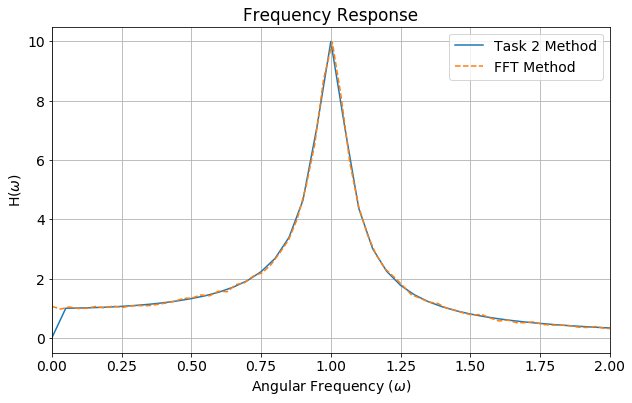

In [634]:
def fft_method(data):
    # Same as task 2 but using FT method.
    ft_input = np.fft.rfft(data.iloc[:,1])
    ft_output = np.fft.rfft(data.iloc[:,2])
    freq_response = abs(ft_output / ft_input)
    return freq_response

# Choose to use the delta function data.
H_arr = get_H_arr(data_delta)
freq_response = fft_method(data_delta)

# Plotting.
t = data_step.iloc[:,0]
N = t.size // 2
omegas1 = np.linspace(0, 2.0, H_arr.size)
omegas2 = np.linspace(0, 2*np.pi*(N-1)/t.max(), N)
plt.title('Frequency Response')
plt.xlabel('Angular Frequency ($\omega$)')
plt.ylabel("H($\omega$)")
plt.grid()
plt.plot(omegas1, H_arr, label = 'Task 2 Method')
plt.plot(omegas2, freq_response[:N], linestyle = '--', label = 'FFT Method')
plt.xlim(0, 2)
plt.legend()
plt.show()

## Task 5
Predict the output response to the “unknown signal” provided using only the input-output data files provided and no information about how the filter works internally. Plot the predicted output signal for the unknown input signal.

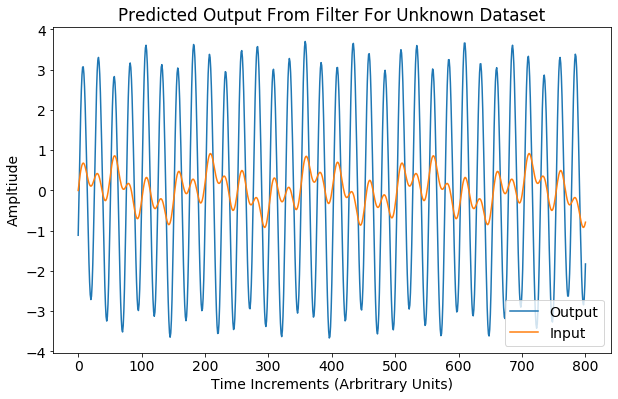

In [633]:
def predictor(data):
    freq_response = fft_method(data_delta)
    input_ft = np.fft.rfft(data.iloc[:,1])
    output_ft = freq_response * input_ft
    predicted_output = np.fft.ifft(output_ft)
    return predicted_output

predicted_output = predictor(data_unknown)
unknown_input = data_unknown.iloc[:801, -1]
plt.title('Predicted Output From Filter For Unknown Dataset')
plt.xlabel('Time Increments (Arbritrary Units)')
plt.ylabel("Ampltiude")
plt.plot(predicted_output, label = 'Output')
plt.plot(unknown_input, label = 'Input')
plt.legend(loc = 'best')
plt.plot()
plt.show()

## Task 6
Propose a minimum model of what is inside the black box. The model must be able to reproduce the frequency response from task 4. Hint: think about the filter as a certain recursion for {y_i} with “inhomogeneous” input {x_i}.

Create a function that takes an array `x`, representing the input signal of values equally spaced in time. The function should return an array representing the output signal.

You can demonstrate the accuracy of your function by comparing its output to some of the input/output signals provided.

In [619]:
### TASK 6 function
def black_box_filter(x):
    # Remove the line that says "raise NotImplementedError"
    # YOUR CODE HERE
    raise NotImplementedError()

In [620]:
def signal_compare(dataset, input_field='x'):
    input_data = dataset[input_field]
    output_field = 'y' + input_field[1:]
    output_data = dataset[output_field]
    bb_output = black_box_filter(input_data)
    diff = np.abs(output_data - bb_output)

    plt.plot(data_step['t'], data_step['y'], label='output', alpha=0.9)
    plt.plot(data_step['t'], black_box_filter(data_step['x']), label='black box', alpha=0.9)
    plt.legend(loc='best')
    plt.xlabel('time')
    plt.ylabel('signal')
    plt.show()

In [ ]:
signal_compare(data_step)

Feel free to add more cells that call `signal_compare` with different data.